In [1]:
import sys
import os
workPath = os.path.abspath('..')
if not workPath in sys.path:
    sys.path.append(workPath)

In [2]:
from everest import mpi
import os
if mpi.rank == 0:
    if os.path.exists('../test.frm'):
        os.remove('../test.frm')

In [3]:
from planetengine.systems import isovisc
from planetengine import params
from planetengine import configs
from planetengine.initials import sinusoidal, constant

In [4]:
mysystem = isovisc.build()
myparams = params.build(Ra = 1e7, urey = 0)
mycase = mysystem[myparams]
myconfigs = configs.build(temperatureField = sinusoidal.build(), temperatureDotField = constant.build())
myreal = mycase[myconfigs]

In [5]:
myparams.hashID

'twiefleexo-atweeswioci'

In [6]:
from planetengine import quickShow

Variable{8735428738466}



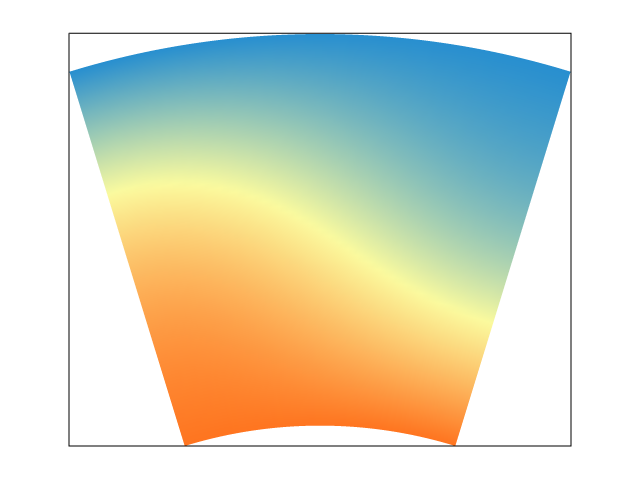

In [7]:
quickShow(myreal.varsOfState['temperatureField'])

In [8]:
myreal.anchor('test', '..')

In [9]:
from everest.builts import load

In [11]:
loaded = load(myreal.hashID, 'test', '..')

In [15]:
assert loaded.hashID == myreal.hashID
assert not loaded is myreal